In [1]:
import os
import zipfile
import shutil
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

In [2]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [40]:
link = 'https://drive.google.com/file/d/1lWb5CGxLPvxdnPWB4rQzzQc9GfGxGXwF/view?usp=sharing'

In [41]:
# fluff, id = link.split('d/')
id = link.split('d/')[1].split('/view?')[0]
print (id)

1lWb5CGxLPvxdnPWB4rQzzQc9GfGxGXwF


In [42]:
downloaded = drive.CreateFile({'id':id})  #drive from PyDrive
downloaded.GetContentFile('Classified Disease.zip')

In [43]:
file_zip = 'Classified Disease.zip'
zip_ref = zipfile.ZipFile(file_zip, 'r')
zip_ref.extractall('./Classified Disease 2/')
zip_ref.close()

print(os.listdir('/content/Classified Disease 2'))

['others', 'Downy mildew on lettuce', 'Bacterial', 'Septoria Blight on lettuce', 'Wilt and leaf blight on lettuce', 'powdery mildew on lettuce', 'healthy']


In [44]:
listdir_image = os.listdir('/content/Classified Disease 2')
print(listdir_image)

['others', 'Downy mildew on lettuce', 'Bacterial', 'Septoria Blight on lettuce', 'Wilt and leaf blight on lettuce', 'powdery mildew on lettuce', 'healthy']


In [45]:
# check the amount of data for each part
dir_image = '/content/Classified Disease 2'

for item in listdir_image:
  class_dir = os.path.join(dir_image,item)
  print(item, " : ",len(os.listdir(class_dir)),"images")

others  :  2 images
Downy mildew on lettuce  :  30 images
Bacterial  :  20 images
Septoria Blight on lettuce  :  19 images
Wilt and leaf blight on lettuce  :  6 images
powdery mildew on lettuce  :  21 images
healthy  :  20 images


In [46]:
#delete directory that is not used
list_category = ['Downy mildew on lettuce', 'Septoria Blight on lettuce', 'Bacterial',
                'Wilt and leaf blight on lettuce', 'powdery mildew on lettuce', 'healthy']

for x in listdir_image:
  if x not in list_category:
    path = os.path.join(dir_image, x)
    if os.path.isfile(path):
      os.remove(path)
    elif os.path.isdir(path):
      shutil.rmtree(path)
    else:
      print("Unknown or already remove!")

listdir_image = os.listdir(dir_image)
listdir_image


['Downy mildew on lettuce',
 'Bacterial',
 'Septoria Blight on lettuce',
 'Wilt and leaf blight on lettuce',
 'powdery mildew on lettuce',
 'healthy']

In [47]:
# check image(count, size, total)
from PIL import Image
total = 0
size = (0,0)

for x in listdir_image:
  dir = os.path.join(dir_image,x)
  y = len(os.listdir(dir))
  print(x+':', y)
  total += y

  img_name = os.listdir(dir)
  for i in range(2):
    img_path = os.path.join(dir, img_name[i])
    img = Image.open(img_path)

    if size == img.size:
      continue
    else:
      size = img.size
      print('+ size', img.size)

print('\nTotal: ', total)

Downy mildew on lettuce: 30
+ size (407, 273)
+ size (1280, 720)
Bacterial: 20
+ size (474, 314)
+ size (474, 474)
Septoria Blight on lettuce: 19
+ size (1200, 770)
+ size (274, 184)
Wilt and leaf blight on lettuce: 6
+ size (520, 390)
+ size (474, 327)
powdery mildew on lettuce: 21
+ size (500, 375)
+ size (900, 1200)
healthy: 20
+ size (474, 356)
+ size (474, 237)

Total:  116


Downy mildew on lettuce


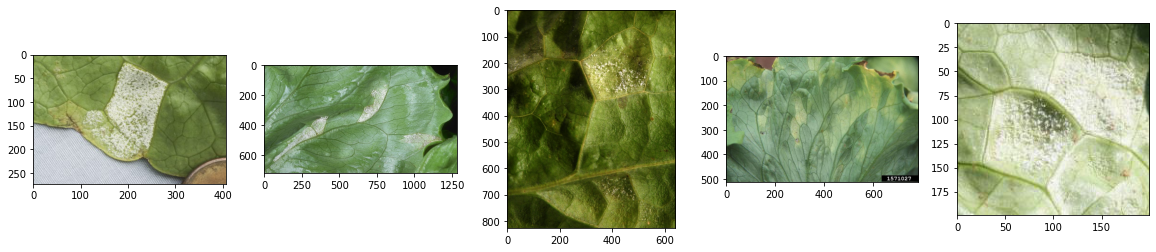

Bacterial


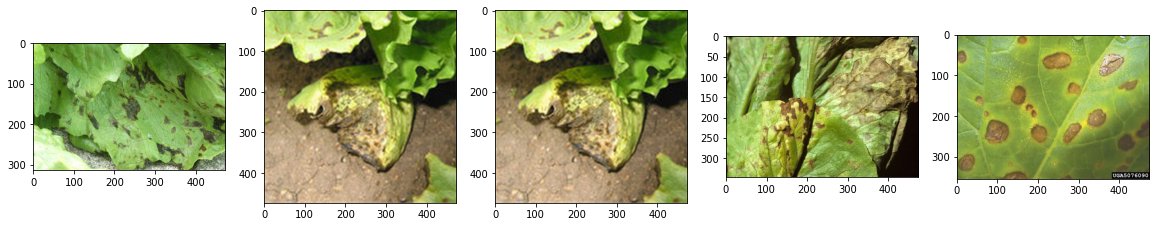

Septoria Blight on lettuce


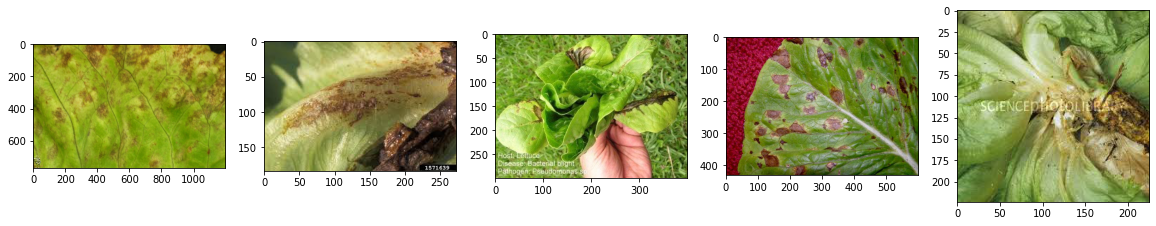

Wilt and leaf blight on lettuce


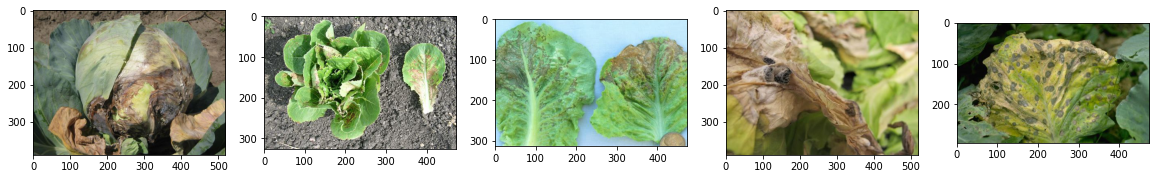

powdery mildew on lettuce


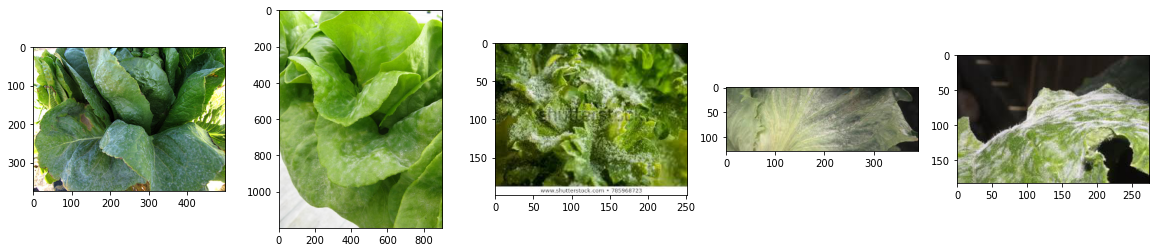

healthy


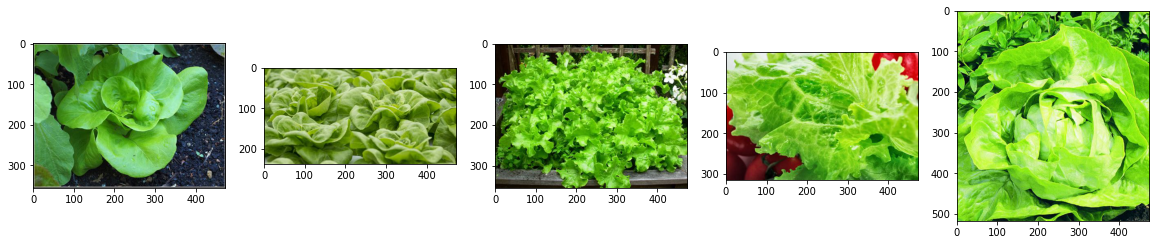

In [50]:
# check image class
for item in listdir_image:
  print(item)
  class_dir = os.path.join(dir_image, item)
  class_image = os.listdir(class_dir)
  plt.figure(figsize=(20,4))
  for i, img_path in enumerate(class_image[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(class_dir, img_path))
    plt.imshow(img)
  plt.show()